In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\sai kumar\Downloads\2_Logistic Regression\Logistic Regression\diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


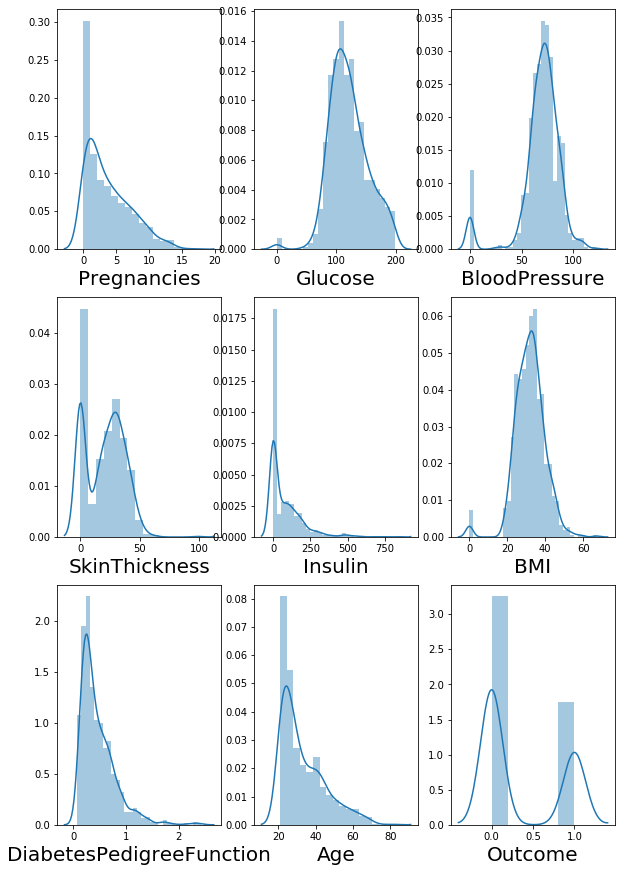

In [5]:
plt.figure(figsize=(10,15))
plotnum=1

for column in data:
    if plotnum<=9:
        ax=plt.subplot(3,3,plotnum)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plotnum+=1
plt.show()

In [6]:
data["Insulin"]=data["Insulin"].replace(0 , data["Insulin"].mean())

In [7]:
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())

In [8]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())

In [9]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

In [10]:
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

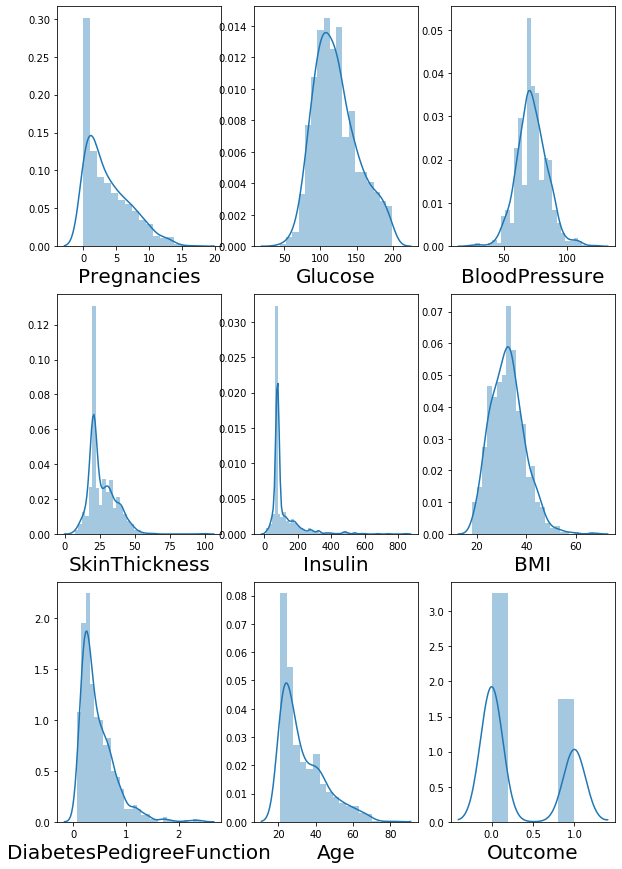

In [11]:
plt.figure(figsize=(10,15))
plotnum=1

for column in data:
    if plotnum<=9:
        ax=plt.subplot(3,3,plotnum)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plotnum+=1
plt.show()

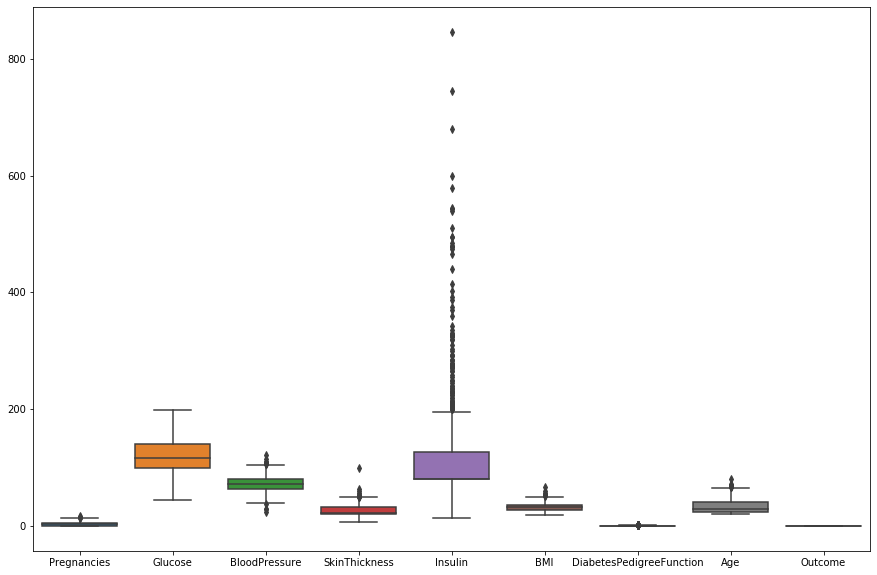

In [12]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,ax=ax)

In [13]:
q=data["Pregnancies"].quantile(0.98)
data_cleaned=data[data["Pregnancies"]<q]

q=data["Insulin"].quantile(0.97)
data_cleaned=data_cleaned[data_cleaned["Insulin"]<q]

q = data_cleaned['BMI'].quantile(0.98)
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.98)
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

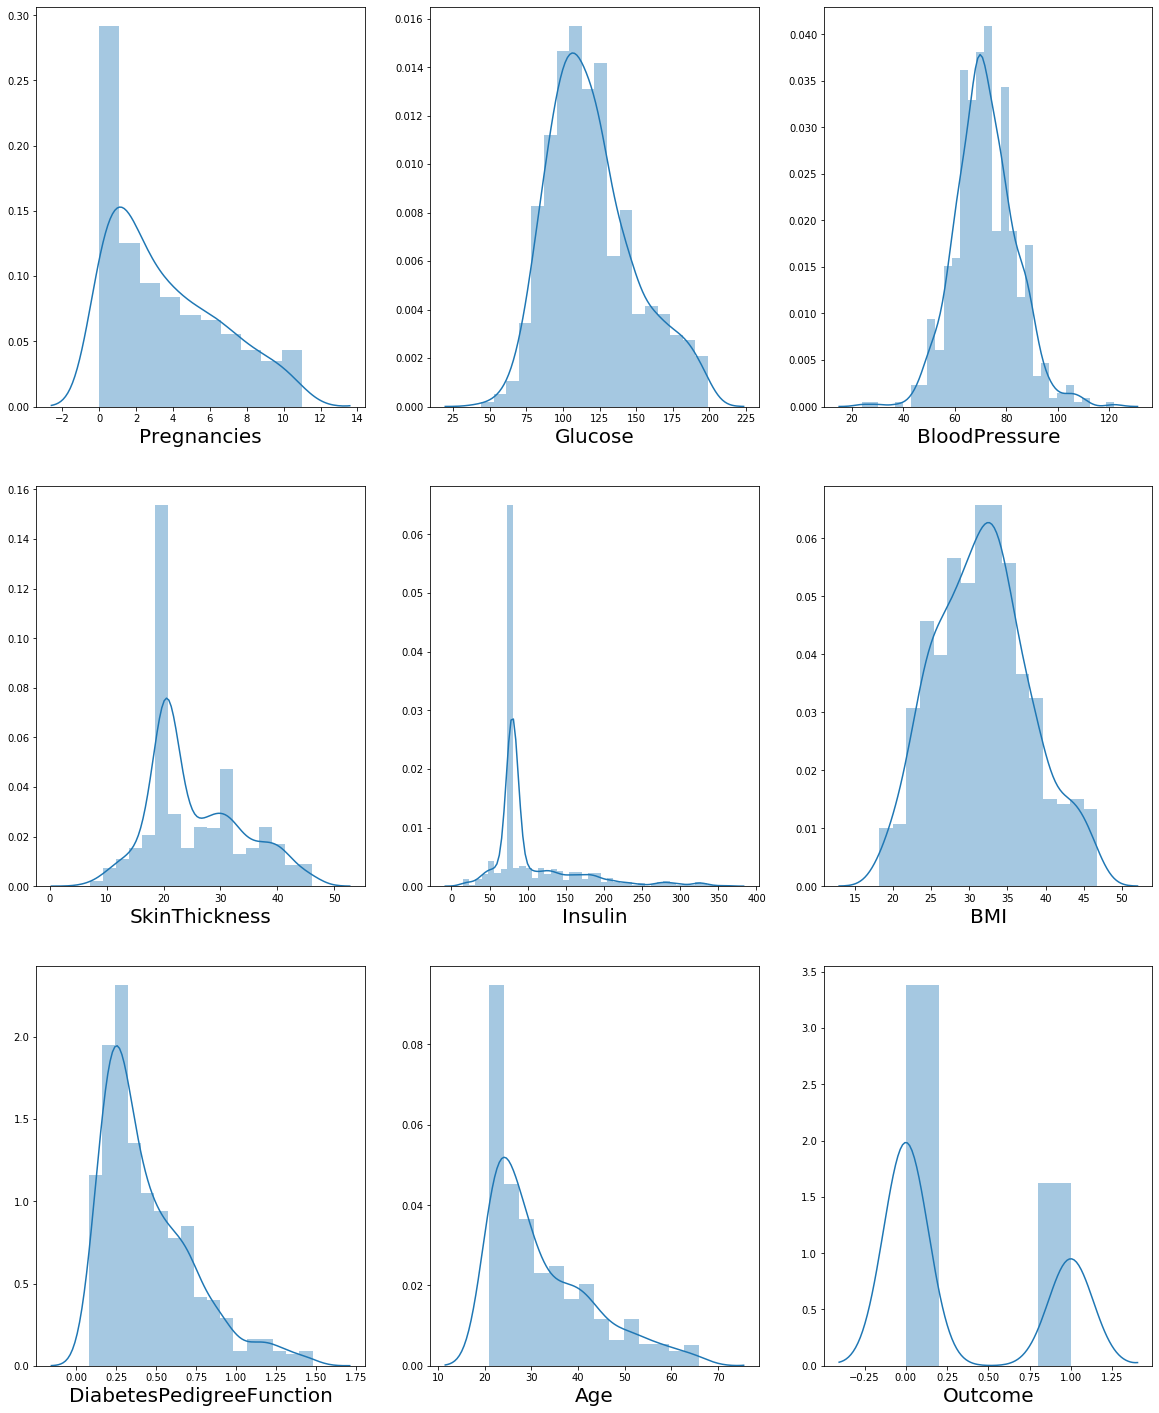

In [14]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [15]:
data_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
X=data_cleaned.drop(columns=["Outcome"])
y=data_cleaned["Outcome"]

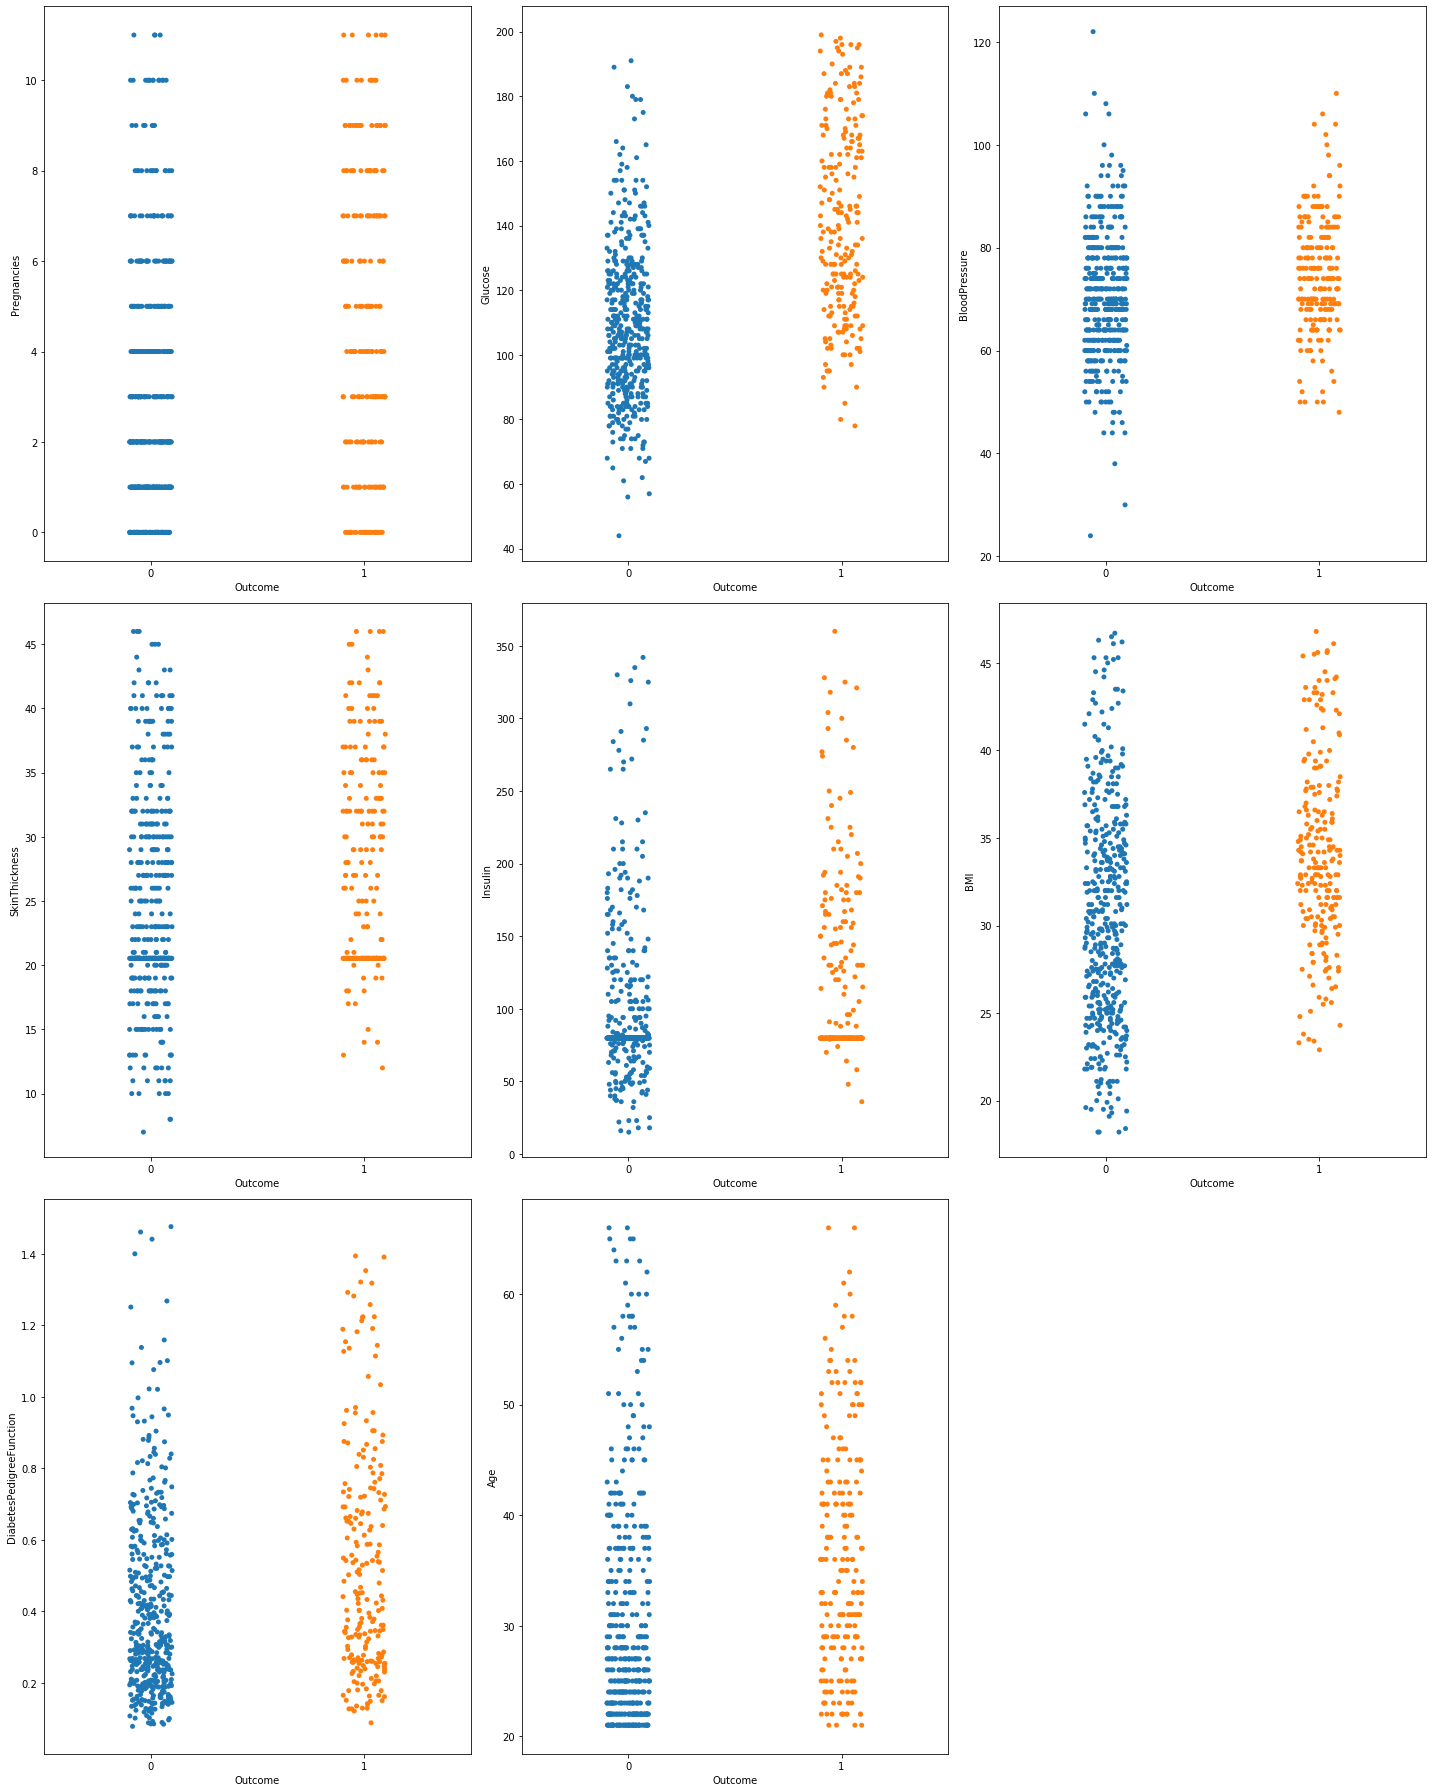

In [21]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [22]:
X.shape

(673, 8)

In [23]:
y.shape

(673,)

In [24]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(X)


In [25]:
x_scaled

array([[ 0.80174005,  0.96205014,  0.01369762, ...,  0.31001919,
         0.63135462,  1.61004351],
       [-0.87186743, -1.17058812, -0.49549457, ..., -0.82800341,
        -0.34153309, -0.12525878],
       [ 1.47118304,  2.14684917, -0.66522531, ..., -1.36449978,
         0.78997761, -0.03392708],
       ...,
       [ 0.46701855,  0.04806232,  0.01369762, ..., -0.89303327,
        -0.71517837, -0.21659048],
       [-0.87186743,  0.21731932, -1.00468677, ..., -0.25899211,
        -0.348583  ,  1.33604842],
       [-0.87186743, -0.89977691, -0.15603311, ..., -0.21021971,
        -0.46843149, -0.85591238]])

In [26]:
vif=pd.DataFrame()

In [27]:
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [28]:
vif["features"]=X.columns

In [29]:
vif

,vif,features
0,1.444466,Pregnancies
1,1.337185,Glucose
2,1.252743,BloodPressure
3,1.446363,SkinThickness
4,1.275547,Insulin
5,1.484308,BMI
6,1.038341,DiabetesPedigreeFunction
7,1.672945,Age


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.30, random_state = 35)

In [31]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\sai kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred = log_reg.predict(x_test)

In [33]:
accuracy=accuracy_score(y_test,y_pred)

In [34]:
accuracy

0.7623762376237624

In [35]:
log_reg.predict(scalar.transform([[1,89,66,23,94,28.1,0.167,21]]))

array([0], dtype=int64)